<a href="https://colab.research.google.com/github/ant9398/School-work-Personal-/blob/main/Regression_regularisee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Charger les packages
import numpy as np
import sklearn
from scipy import stats
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Type

In [ ]:
# suppression des messages warnings
import warnings
warnings.filterwarnings("ignore")

# Importer les données

In [ ]:
df = pd.read_csv('credit_immobilier_ISF.csv', na_values = '?')

# Stats générales

In [ ]:
df.shape

(1021, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compte_courant            1021 non-null   object 
 1   duree_emprunt_mois        1021 non-null   int64  
 2   historique_credit         1021 non-null   object 
 3   raison                    1021 non-null   object 
 4   montant                   1021 non-null   int64  
 5   compte_epargne            1020 non-null   object 
 6   duree_emploi              1021 non-null   object 
 7   annees_presence_logement  1018 non-null   float64
 8   age                       1020 non-null   float64
 9   autre_credit              1021 non-null   object 
 10  logement                  1021 non-null   object 
 11  nbre_emprunts_actuels     1021 non-null   int64  
 12  job                       1018 non-null   object 
 13  dependants                1021 non-null   object 
 14  telephon

In [ ]:
df.head()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
0,< 0 Euro,6,critique,ameublement,1169,inconnu,> 7 annees,4.0,67.0,aucun,proprietaire,2,qualifie,1,oui,non,8135.110140
1,1 - 200 Euro,48,bon,ameublement,5951,< 100 Euro,1 - 4 annees,2.0,22.0,aucun,proprietaire,1,qualifie,1,oui,oui,19334.307686
2,inconnu,12,critique,education,2096,< 100 Euro,4 - 7 annees,3.0,49.0,aucun,proprietaire,1,non_qualifie,2,oui,non,4864.954258
3,< 0 Euro,42,bon,ameublement,7882,< 100 Euro,4 - 7 annees,4.0,45.0,aucun,autre,1,qualifie,2,oui,non,22152.947349
4,< 0 Euro,24,pauvre,auto,4870,< 100 Euro,1 - 4 annees,4.0,53.0,aucun,autre,2,qualifie,2,oui,oui,23900.704144


In [ ]:
df.describe()

,duree_emprunt_mois,montant,annees_presence_logement,age,nbre_emprunts_actuels,revenufinal
count,1021.000000,1021.000000,1018.000000,1020.000000,1021.000000,1021.000000
mean,20.770813,3250.088149,2.844794,35.491176,1.409403,12273.073874
std,12.050318,2830.788792,1.104864,11.395078,0.576390,11200.509536
min,4.000000,250.000000,1.000000,19.000000,1.000000,734.476054
25%,12.000000,1352.000000,2.000000,27.000000,1.000000,5192.478646
50%,18.000000,2299.000000,3.000000,33.000000,1.000000,8615.582896
75%,24.000000,3966.000000,4.000000,42.000000,2.000000,15559.590686
max,72.000000,18424.000000,4.000000,75.000000,4.000000,79354.527366


In [ ]:
df.describe(include=['O']) #pour variables catégorielles

,compte_courant,historique_credit,raison,compte_epargne,duree_emploi,autre_credit,logement,job,dependants,telephone,defaillant
count,1021,1021,1021,1020,1021,1021,1021,1018,1021,1021,1020
unique,4,5,6,5,6,4,4,5,3,1,2
top,inconnu,bon,ameublement,< 100 Euro,1 - 4 annees,aucun,proprietaire,qualifie,1,oui,non
freq,402,535,486,611,349,834,731,648,864,1021,717


In [ ]:
echantillonColonnes = []
for i in df.columns:
    listcolumn = str(list(df[i].head(5)))
    echantillonColonnes.append(listcolumn)

In [ ]:
d = {'colonne': list(df.columns), 'type': list(df.dtypes), 'Echantillon':echantillonColonnes}
colonnesTypes = pd.DataFrame(data=d)

pd.options.display.max_rows = 24
colonnesTypes

,colonne,type,Echantillon
0,compte_courant,object,"['< 0 Euro', '1 - 200 Euro', 'inconnu', '< 0 E..."
1,duree_emprunt_mois,int64,"[6, 48, 12, 42, 24]"
2,historique_credit,object,"['critique', 'bon', 'critique', 'bon', 'pauvre']"
3,raison,object,"['ameublement', 'ameublement', 'education', 'a..."
4,montant,int64,"[1169, 5951, 2096, 7882, 4870]"
5,compte_epargne,object,"['inconnu', '< 100 Euro', '< 100 Euro', '< 100..."
6,duree_emploi,object,"['> 7 annees', '1 - 4 annees', '4 - 7 annees',..."
7,annees_presence_logement,float64,"[4.0, 2.0, 3.0, 4.0, 4.0]"
8,age,float64,"[67.0, 22.0, 49.0, 45.0, 53.0]"
9,autre_credit,object,"['aucun', 'aucun', 'aucun', 'aucun', 'aucun']"


# Analyse Univariée

In [ ]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
df.dtypes.reset_index()

,index,0
0,compte_courant,object
1,duree_emprunt_mois,int64
2,historique_credit,object
3,raison,object
4,montant,int64
5,compte_epargne,object
6,duree_emploi,object
7,annees_presence_logement,float64
8,age,float64
9,autre_credit,object


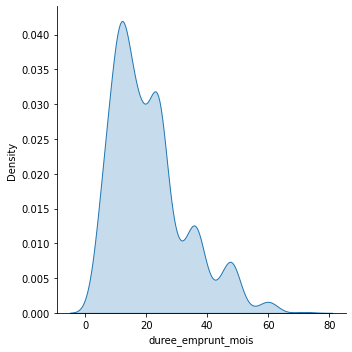

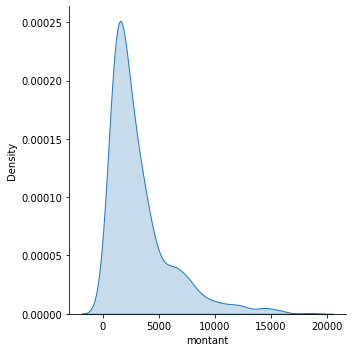

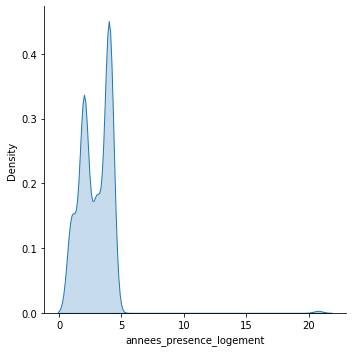

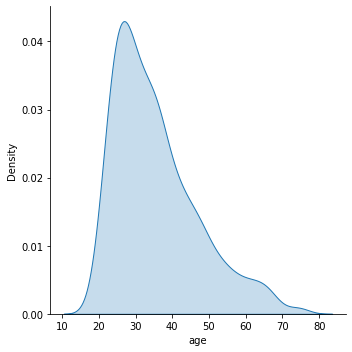

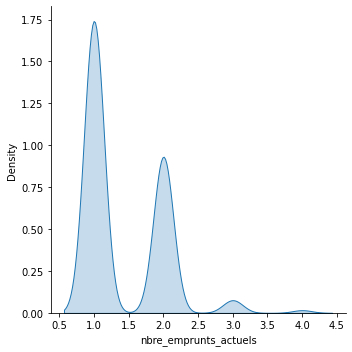

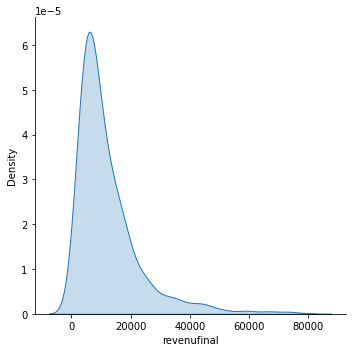

In [ ]:
#pour les variables numériques

for col in list(numerical):
    sns.displot(df, x=col, fill=True, kind="kde")
    plt.show()

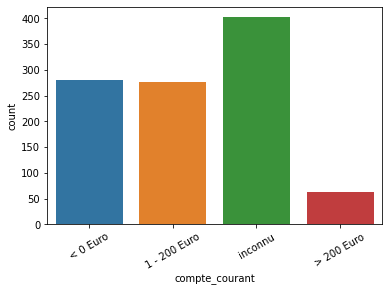

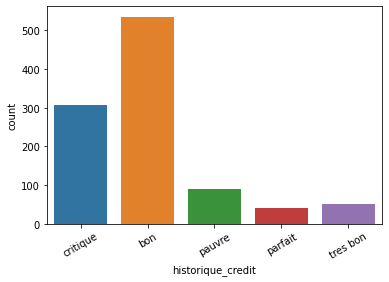

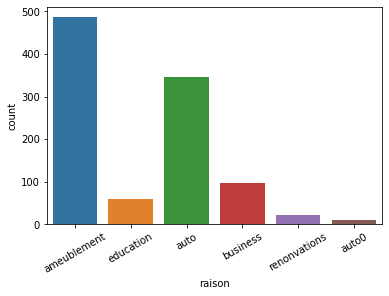

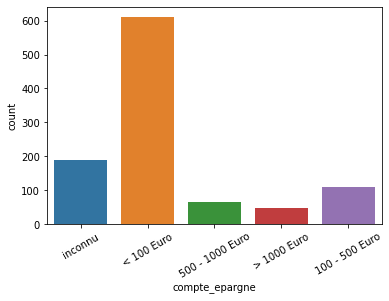

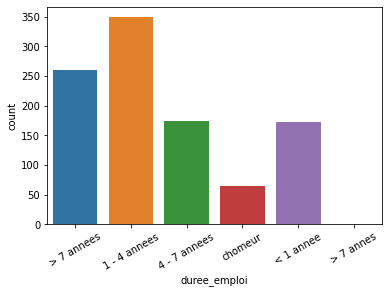

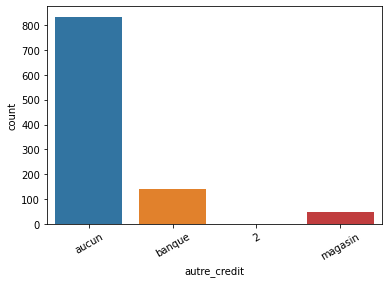

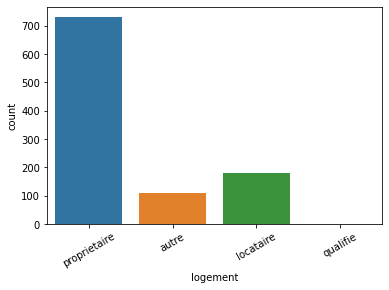

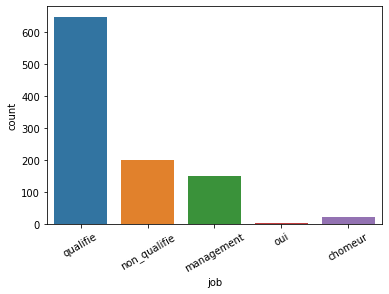

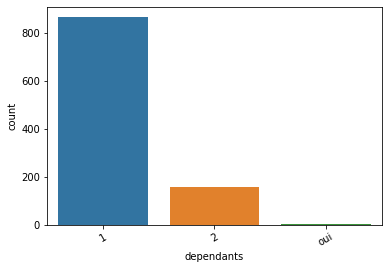

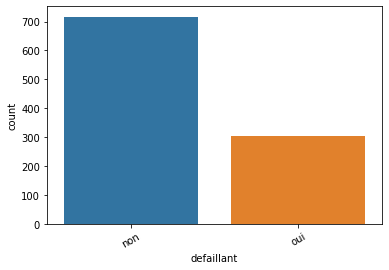

In [ ]:
#pour les variables catégorielles

for cat in categorical:
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
    plt.show()

# Préparation pour la modélisation

## Traitement des catégories erreurs

-Pour la variable 'raison', il faut fusionner les niveaux 'auto' et 'auto0' en un seul niveau 'auto'


-Pour les variables 'compte-courant' et 'compte_epargne', le niveau 'inconnu' doit être transformé en NaN 

-Pour la variable 'autre_credit', le niveau '2' doit être transformé en NaN 

-Pour la variable 'logement', le niveau 'qualifie' doit être transformé en NaN 

-Pour les variables 'defaillant' 'job' 'compte_epargne', le niveau '20.77...'doit être transformé en NaN 

-Pour la variable 'duree emploi', il faut fusionner les niveaux '> 7 annees' et '> 7 annes' en un seul niveau '> 7 annees' 

-Pour la variable 'dependants' et 'job', le niveau 'oui' doit être transformé en NaN.

-La variable 'telephone' a un seul un mode et est donc inutile pour la modélisation


In [ ]:
df['raison'] = df['raison'].replace({'auto0':'auto'})

df['compte_courant'] = df['compte_courant'].replace({'inconnu':'?'})
df['compte_epargne'] = df['compte_epargne'].replace({'inconnu':'?'})

df['autre_credit'] = df['autre_credit'].replace({'2':'?'})

df['logement'] = df['logement'].replace({'qualifie':'?'})

df['compte_epargne'] = df['compte_epargne'].replace({'20.77081292850147':'?'})
df['defaillant'] = df['defaillant'].replace({'20.77081292850147':'?'})
df['job'] = df['job'].replace({'20.77081292850147':'?'})

df['duree_emploi'] = df['duree_emploi'].replace({'> 7 annes':'> 7 annees'})

df['job'] = df['job'].replace({'oui':'?'})
df['dependants'] = df['dependants'].replace({'oui':'?'})

df = df.drop('telephone', 1)

In [ ]:
df[df=='?'] = np.nan

## Analyse Univariée corrigé

In [ ]:
categorical = df.select_dtypes('object')
numerical = df.select_dtypes('number')
df.dtypes.reset_index()

,index,0
0,compte_courant,object
1,duree_emprunt_mois,int64
2,historique_credit,object
3,raison,object
4,montant,int64
5,compte_epargne,object
6,duree_emploi,object
7,annees_presence_logement,float64
8,age,float64
9,autre_credit,object


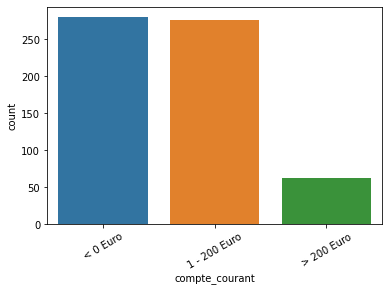

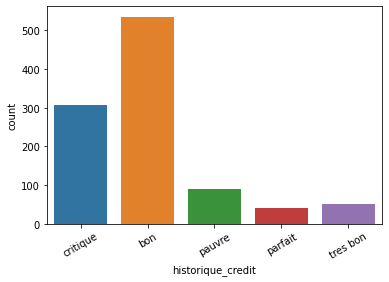

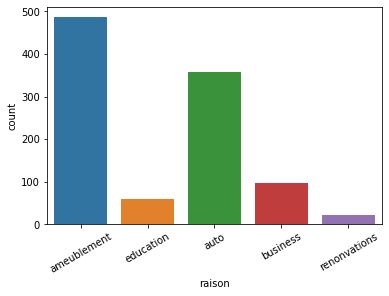

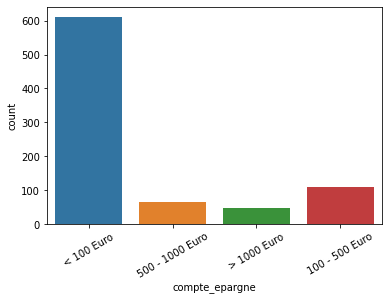

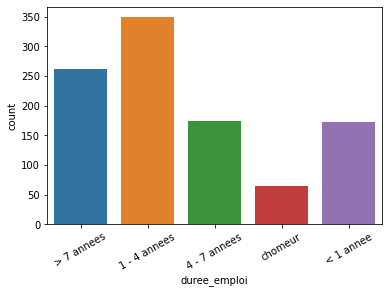

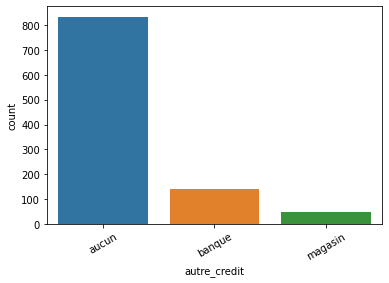

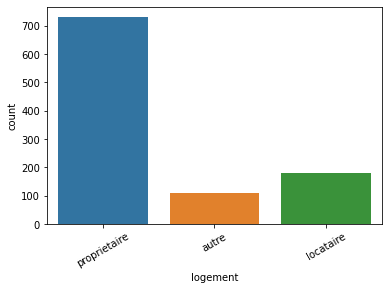

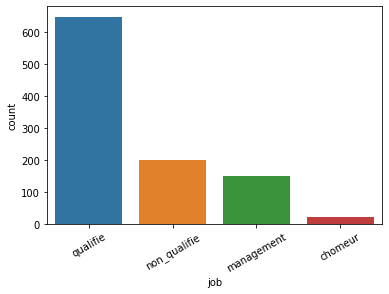

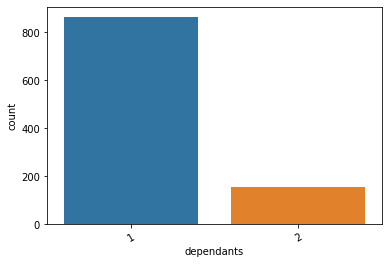

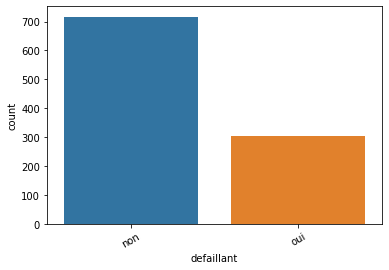

In [ ]:
#pour les variables catégorielles, après correction

for cat in categorical:
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
    plt.show()

C'est mieux

## Traitement des valeurs manquantes

In [ ]:
#Valeurs manquantes par variable
df.isnull().sum(axis=0).reset_index()

,index,0
0,compte_courant,402
1,duree_emprunt_mois,0
2,historique_credit,0
3,raison,0
4,montant,0
5,compte_epargne,190
6,duree_emploi,0
7,annees_presence_logement,3
8,age,1
9,autre_credit,1


Environ 40% de valeurs manquantes pour la variable 'compte_courant', nous décidons de la garder et traiter les valeurs manquantes par des méthodes classiques.

Cependant, il serait intéressant de voir la performance de notre modélisation, si nous décidons par exemple de prédir et remplacer les valeurs manquantes de la variable 'compte_courant' à partir des autres variables.

In [ ]:
# remplacement valeurs manquantes par la moyenne pour les variables numériques
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# remplacement valeurs manquantes par le mode pour les variables catégorielles
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
#vérification
df.isnull().sum(axis=0).reset_index()

,index,0
0,compte_courant,0
1,duree_emprunt_mois,0
2,historique_credit,0
3,raison,0
4,montant,0
5,compte_epargne,0
6,duree_emploi,0
7,annees_presence_logement,0
8,age,0
9,autre_credit,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff442b2310>,
      dtype=object)

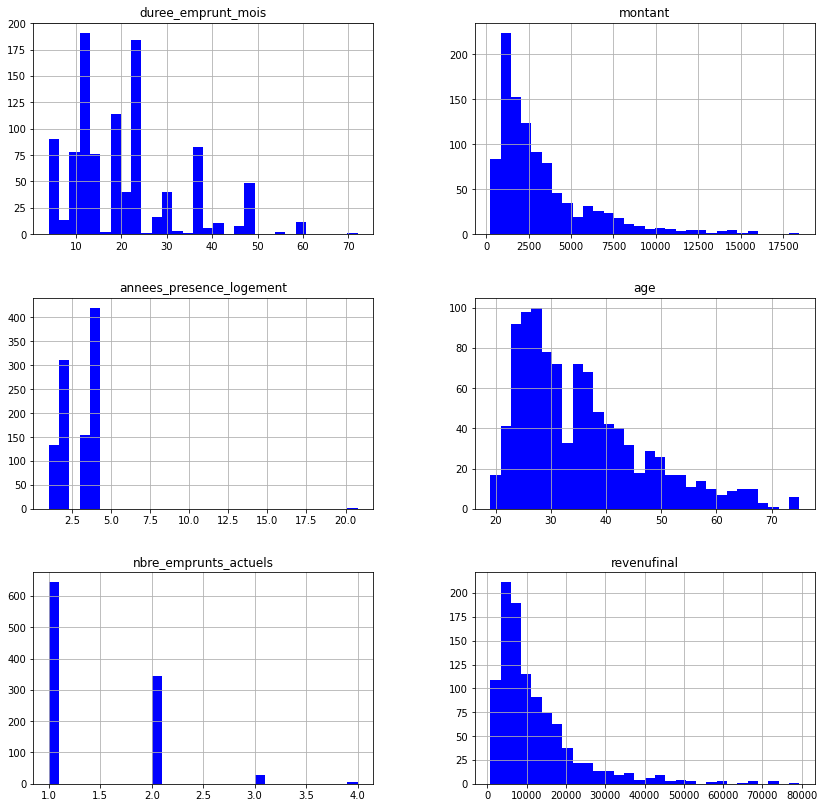

In [ ]:
df.hist(bins = 30, figsize = (14,14), color = 'b')

## Analyse Multivariée

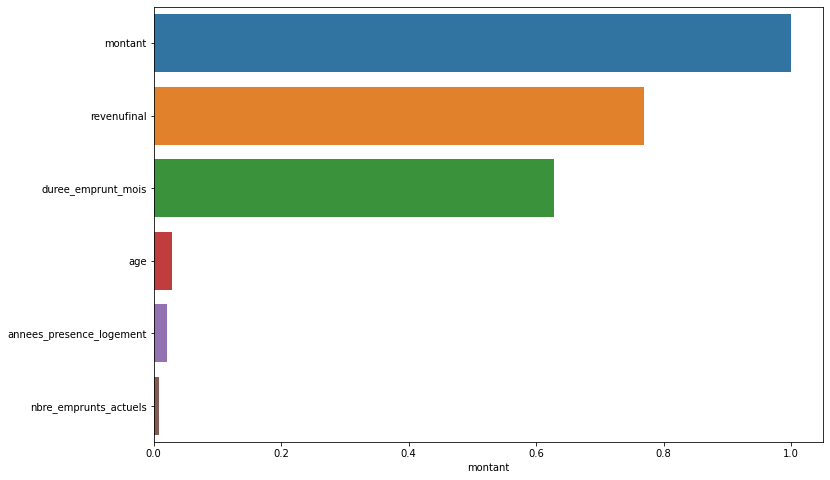

In [ ]:
# corrélation variables numériques avec prix
df_corr = abs(df[['duree_emprunt_mois','montant','annees_presence_logement','age','nbre_emprunts_actuels',
                  'revenufinal']].corr())
corrprix = df_corr.sort_values('montant',ascending=False)
plt.figure(figsize=(12, 8))
sn.barplot(x=corrprix['montant'], y=corrprix.index)
plt.show()

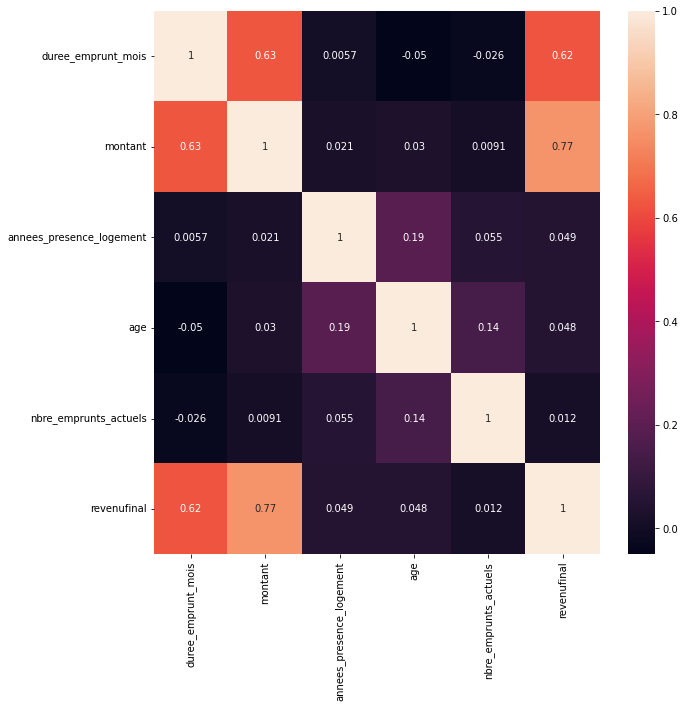

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10, 10))
sn.heatmap(correlations, annot = True);

# Encodage

In [ ]:
# Création de dummy variables pour les variables catégorielles One Hot Encoder 
df = pd.get_dummies(df)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   duree_emprunt_mois                1021 non-null   int64  
 1   montant                           1021 non-null   int64  
 2   annees_presence_logement          1021 non-null   float64
 3   age                               1021 non-null   float64
 4   nbre_emprunts_actuels             1021 non-null   int64  
 5   revenufinal                       1021 non-null   float64
 6   compte_courant_20.77081292850147  1021 non-null   uint8  
 7   compte_courant_1 - 200 Euro       1021 non-null   uint8  
 8   compte_courant_< 0 Euro           1021 non-null   uint8  
 9   compte_courant_> 200 Euro         1021 non-null   uint8  
 10  historique_credit_bon             1021 non-null   uint8  
 11  historique_credit_critique        1021 non-null   uint8  
 12  histor

,duree_emprunt_mois,montant,annees_presence_logement,age,nbre_emprunts_actuels,revenufinal,compte_courant_20.77081292850147,compte_courant_1 - 200 Euro,compte_courant_< 0 Euro,compte_courant_> 200 Euro,...,job_chomeur,job_management,job_non_qualifie,job_qualifie,dependants_20.77081292850147,dependants_1,dependants_2,defaillant_20.77081292850147,defaillant_non,defaillant_oui
0,6,1169,4.0,67.0,2,8135.110140,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,48,5951,2.0,22.0,1,19334.307686,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,12,2096,3.0,49.0,1,4864.954258,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,42,7882,4.0,45.0,1,22152.947349,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,24,4870,4.0,53.0,2,23900.704144,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# Modélisation

In [ ]:
X = df.drop('montant', axis=1)
y = df['montant']

## Phase 1 : régression linéaire classique 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 52)

In [ ]:
lr = LinearRegression()

# entrainement sur le train data set
lr.fit(X_train,y_train)

# erreur mse sur le test data set comme base de comparaison
mse_test = mean_squared_error(y_test, lr.predict(X_test))
# sur le train data set 
mse_train = mean_squared_error(y_train, lr.predict(X_train))

In [ ]:
print('mse du test=',mse_test)

mse du test= 3535161.8518107813


In [ ]:
rmse_test = np.sqrt(mse_test)
print('rmse du test=',rmse_test)

rmse du test= 1880.202609244754


In [ ]:
r2_test = r2_score(y_test, lr.predict(X_test))
print('r2 du test=',r2_test)

r2 du test= 0.6176861329510573


In [ ]:
#r2 ajusté
Adj_r2 = 1 - (1-r2_test) * (len(y)-1)/(len(y)-X.shape[1]-1)
print('r2 ajusté du test=',Adj_r2)

r2 ajusté du test= 0.598806435812838


Le R2 et R2 ajusté ne sont pas top

# Preprocessing

In [ ]:
# mise à l'échelle
# fit sur le train data set
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
# transform sur le train data set
X_train_s = scaler.transform(X_train)

In [ ]:
# transform sur le test data set
X_test_s = scaler.transform(X_test)

# Ridge régression

In [ ]:
# définition d'une plage de valeurs alpha à tester
n_alphas = 300
alphas = np.logspace(-5, 10, n_alphas)

In [ ]:
ridge = Ridge()

coefs = []
errors = []
errorstrain = []
r2 = []
r2train = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_s, y_train)
    coefs.append(ridge.coef_)
    errors.append([mse_test, np.mean((ridge.predict(X_test_s) - y_test) ** 2)])
    errorstrain.append([mse_train, np.mean((ridge.predict(X_train_s) - y_train) ** 2)]) 
    r2.append(r2_score(y_test, ridge.predict(X_test_s)))
    r2train.append(r2_score(y_train, ridge.predict(X_train_s)))

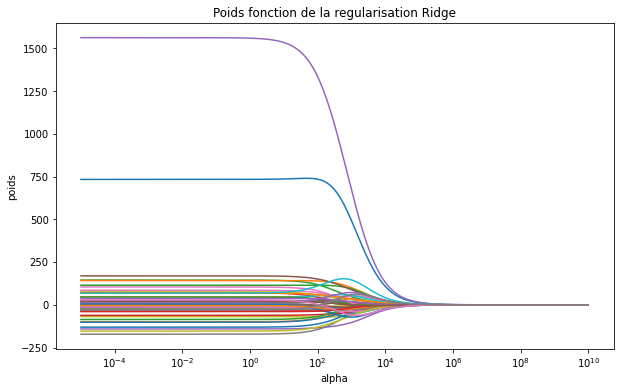

In [ ]:
# évolution des différents poids attribués aux variables explicatives 
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Poids fonction de la regularisation Ridge')
#plt.axis('tight')
plt.show()

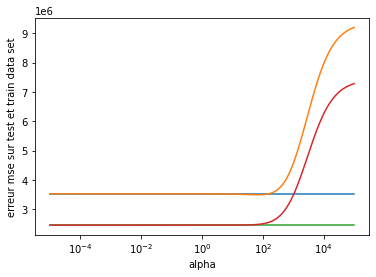

In [ ]:
# évolution mse fonction de alpha
ax = plt.gca()

ax.plot(alphas, errors)
ax.plot(alphas, errorstrain)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur mse sur test et train data set')
plt.axis('tight')
plt.show()

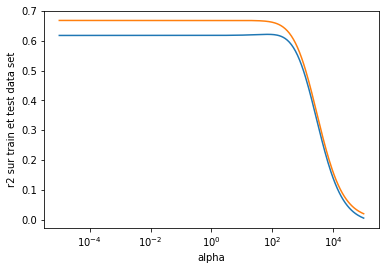

In [ ]:
# évolution du R2 fonction de alpha
ax = plt.gca()

ax.plot(alphas, r2)
ax.plot(alphas, r2train)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 sur train et test data set')
plt.axis('tight')
plt.show()

In [ ]:
# R2 sur test set
max(r2)

0.6213380191735203

In [ ]:
# R2 sur train set
max(r2train)

0.6680213372766809

## Ridge Cross Validation

In [ ]:
# plage de valeurs de alpha à tester 
n_alphas = 300
my_alphas = np.logspace(-5, 20, n_alphas)

In [ ]:
ridgecv = RidgeCV(alphas = my_alphas, scoring = 'neg_mean_squared_error', normalize = True,cv=3)
ridgecv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.21230540e-05, 1.46968439e-05, 1.78170632e-05,
       2.15997219e-05, 2.61854596e-05, 3.17447741e-05, 3.84843611e-05,
       4.66547988e-05, 5.65598646e-05, 6.85678294e-05, 8.31251499e-05,
       1.00773068e-04, 1.22167735e-04, 1.48104605e-04, 1.79548012e-04,
       2.17667025e-04, 2.63878910e-04, 3.19901828e-04, 3.87818715e-04,
       4.70154722e-04, 5.69971109e-0...
       2.57852435e+18, 3.12595900e+18, 3.78961698e+18, 4.59417313e+18,
       5.56954091e+18, 6.75198452e+18, 8.18546731e+18, 9.92328623e+18,
       1.20300535e+19, 1.45840988e+19, 1.76803818e+19, 2.14340223e+19,
       2.59845810e+19, 3.15012480e+19, 3.81891330e+19, 4.62968923e+19,
       5.61259726e+19, 6.80418197e+19, 8.24874655e+19, 1.00000000e+20]),
        cv=3, normalize=True, scoring='neg_mean_squared_error')

In [ ]:
# best alpha
ridgecv.alpha_

0.047745205385661314

C'est la valeur optimale de alpha avec la méthode Lasso Cross 
validation 

In [ ]:
# Ridge avec le meilleur alpha
ridge_best = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_best.fit(X_train, y_train)
print("mse sur test data set avec le alpha optimal : ")
print(mean_squared_error(y_test, ridge_best.predict(X_test)))

mse sur test data set avec le alpha optimal : 
3509155.413629288


In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, ridge_best.predict(X_test)))
print('rmse_test avec le alpha optimial=',rmse_test)

rmse_test avec le alpha optimial= 1873.273982531463


In [ ]:
# score R2 avec Ridge
r2opti = r2_score(y_test, ridge_best.predict(X_test))
print('r2_test avec le alpha optimial=',r2opti)


r2_test avec le alpha optimial= 0.620498627078941


In [ ]:
ridge_best.fit(X, y)
pd.Series(ridge_best.coef_, index = X.columns)

duree_emprunt_mois               57.969414
annees_presence_logement        -14.960401
age                               3.734744
nbre_emprunts_actuels            31.208949
revenufinal                       0.137086
                                   ...    
dependants_1                    -65.308029
dependants_2                     64.089276
defaillant_20.77081292850147    206.565303
defaillant_non                   24.392093
defaillant_oui                  -25.406991
Length: 48, dtype: float64

Le R2 obtenu avec Ridge est très légèrement meilleur que celui obtenu avec une régression linéaire classique. Idem pour la MSE et la RMSE.

# Lasso

In [ ]:
#application du Lasso
# test alpha sur une plage de valeurs
n_alphas = 300
alphas = np.logspace(-5, 5, n_alphas)
lasso = Lasso(fit_intercept=False)
r2o = []
coefs = []
errors = []
errorst = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_s, y_train)
    coefs.append(lasso.coef_)
    errors.append([mse_test, np.mean((lasso.predict(X_test_s) - y_test) ** 2)])
    errorst.append([mse_train, np.mean((lasso.predict(X_train_s) - y_train) ** 2)])
    r2o.append(r2_score(y_test, lasso.predict(X_test_s)))

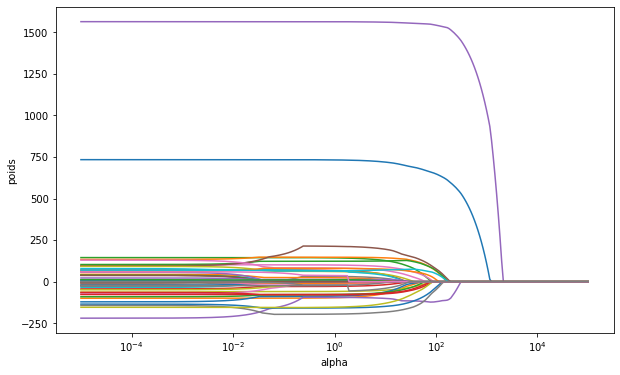

In [ ]:
# visualisation évolution des poids en fonction de alpha
plt.figure(figsize=(10,6))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.axis('tight')
plt.show()

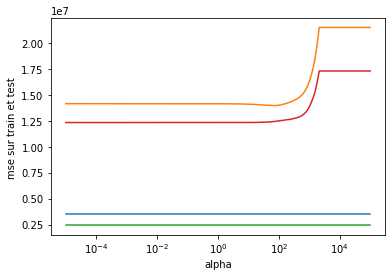

In [ ]:
# évolution de l'erreur mse fonction de alpha
ax = plt.gca()

ax.plot(alphas, errors)
ax.plot(alphas, errorst)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mse sur train et test ')
plt.axis('tight')
plt.show()

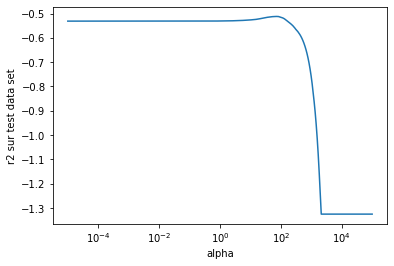

In [ ]:
# évolution du R2 fonction de alpha
ax = plt.gca()

ax.plot(alphas, r2o)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('r2 sur test data set')
plt.axis('tight')
plt.show()

## Lasso Cross Validation

In [ ]:
# definition plage de valeurs
n_alphas = 300
my_alphas = np.logspace(-2, 3, n_alphas)

In [ ]:
# outil pour la détection de la solution la plus performante en validation croisée
# random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
# cv = 5 pour 5-fold validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5)
# lancement sur l'échantillon d'apprentissage
lcv.fit(X_train_s, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.03925568e-02, 1.08005237e-02, 1.12245057e-02,
       1.16651313e-02, 1.21230540e-02, 1.25989528e-02, 1.30935333e-02,
       1.36075289e-02, 1.41417017e-02, 1.46968439e-02, 1.52737785e-02,
       1.58733611e-02, 1.64964807e-02, 1.71440614e-02, 1.78170632e-02,
       1.85164842e-02, 1.92433614e-02, 1.99987727e-02, 2.07838382e-02,
       2.15997219e-02, 2.24476338e-0...
       4.81143084e+02, 5.00030684e+02, 5.19659730e+02, 5.40059328e+02,
       5.61259726e+02, 5.83292359e+02, 6.06189899e+02, 6.29986298e+02,
       6.54716840e+02, 6.80418197e+02, 7.07128478e+02, 7.34887289e+02,
       7.63735792e+02, 7.93716762e+02, 8.24874655e+02, 8.57255673e+02,
       8.90907830e+02, 9.25881025e+02, 9.62227117e+02, 1.00000000e+03]),
        cv=5, fit_intercept=False, normalize=False, random_state=0)

In [ ]:
#valeurs des MSE en validation croisée
print(lcv.mse_path_)

[[1.23904922e+07 1.43791489e+07 1.81865681e+07 1.47050013e+07
  1.11594754e+07]
 [1.23530696e+07 1.42416695e+07 1.79661611e+07 1.46617105e+07
  1.11056200e+07]
 [1.23202603e+07 1.41139124e+07 1.77585682e+07 1.46222762e+07
  1.10565251e+07]
 ...
 [1.39418769e+07 1.38341654e+07 3.51830881e+10 1.56169598e+07
  1.30290580e+07]
 [1.39418843e+07 1.38341711e+07 3.51833348e+10 1.56169652e+07
  1.30290713e+07]
 [1.39418915e+07 1.38341769e+07 3.51835722e+10 1.56169704e+07
  1.30290841e+07]]


In [ ]:
#moyenne mse en validation croisée pour chaque alpha
avg_mse = np.mean(lcv.mse_path_,axis=1)

In [ ]:
#alphas vs. MSE en cross-validation
print(pd.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse})) 

           alpha           MSE
0    1000.000000  1.416414e+07
1     962.227117  1.406565e+07
2     925.881025  1.397431e+07
3     890.907830  1.388959e+07
4     857.255673  1.381099e+07
..           ...           ...
295     0.011665  7.047797e+09
296     0.011225  7.047851e+09
297     0.010801  7.047902e+09
298     0.010393  7.047951e+09
299     0.010000  7.047999e+09

[300 rows x 2 columns]


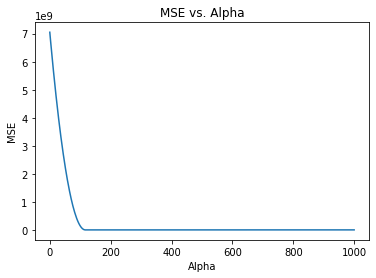

In [ ]:
#évolution mse fonction de alpha
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

In [ ]:
#best alpha
print(lcv.alpha_) 

222.75429519995564


C'est le meilleur alpha

In [ ]:
lasso = Lasso(fit_intercept=False)
lasso.set_params(alpha= lcv.alpha_)
lasso.fit(X_train_s, y_train)
mse_t = mean_squared_error(y_test, lasso.predict(X_test_s))

In [ ]:
print('mean squared error sur le test data set :')
mse_t

mean squared error sur le test data set :


14283120.255881332

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_s)))
print('rmse sur le test data set :',rmse_test)

rmse sur le test data set : 3779.301556621452


In [ ]:
r2optim = r2_score(y_test, lasso.predict(X_test_s))
print('r2_test avec le alpha optimial=',r2optim)

r2_test avec le alpha optimial= -0.5446633470979632


In [ ]:
# certaines variables peuvente etre éliminées avec un poids à zéro
pd.Series(lasso.coef_, index=X.columns)

duree_emprunt_mois               578.809246
annees_presence_logement          -0.000000
age                                0.000000
nbre_emprunts_actuels              0.000000
revenufinal                     1498.521882
                                   ...     
dependants_1                      -0.000000
dependants_2                       0.000000
defaillant_20.77081292850147      -0.000000
defaillant_non                    -0.000000
defaillant_oui                     0.000000
Length: 48, dtype: float64

Text(0.5, 1.0, 'Importance des Features')

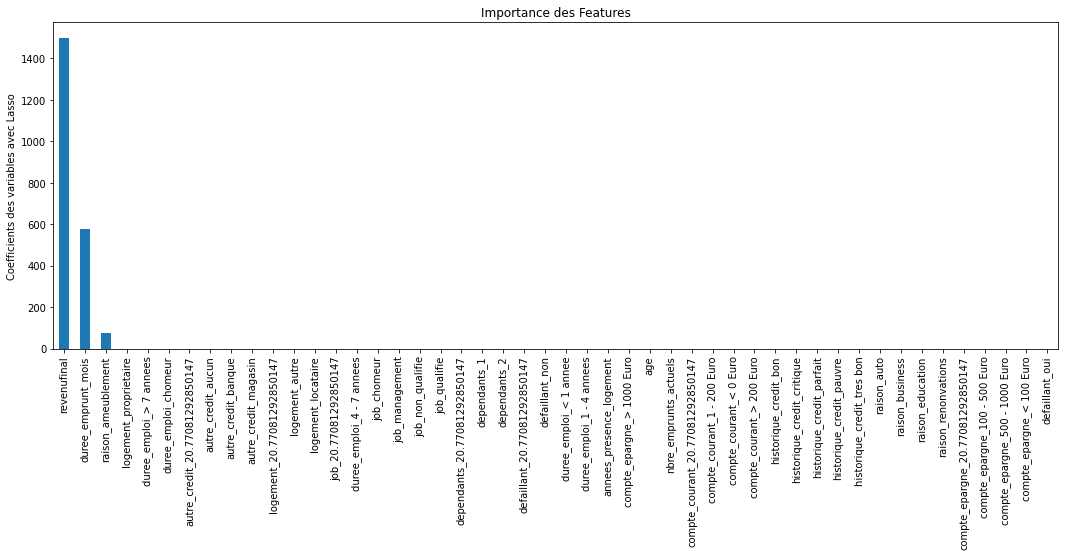

In [ ]:
# feature importance

importance = pd.Series(np.abs(lasso.coef_.ravel()))
importance.index = X.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Coefficients des variables avec Lasso')
plt.title('Importance des Features')

Par rapport à Ridge, Lasso peut supprimer des variables en mettant leur poids à zéro. Ici, Lasso a gardé 'revenufinal', 'duree_emprunt_mois', 'raison_ameumblement' et a supprimé tous les autres features. 


# Elastic Net

## Hyperparamètres par défauts

In [ ]:
# Elastic 

elastic = ElasticNet()
elastic.fit(X_train , y_train)
print(" Training Accuracy : " , elastic.score(X_train , y_train))
print(" Testing Accuracy : " , elastic.score(X_test , y_test))

 Training Accuracy :  0.6485537068500522
 Testing Accuracy :  0.6249606400185507


In [ ]:
print('r2_train= ',r2_score(y_train, elastic.predict(X_train)))

r2_train=  0.6485537068500522


In [ ]:
print('r2_test= ',r2_score(y_test, elastic.predict(X_test)))

r2_test=  0.6249606400185507


## Hyperparamètres choisis

In [ ]:
# lambda_1*L1 + lambda_2*L2 
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet(alpha = 0.1 + 0.1 , l1_ratio = 0.1/(0.1 + 0.1))
model.fit(X_train , y_train)
print(" Training Accuracy : " , model.score(X_train , y_train))
print(" Testing Accuracy : " , model.score(X_test , y_test))

 Training Accuracy :  0.6602670917261009
 Testing Accuracy :  0.6298181143543022


In [ ]:
print('r2_train= ',r2_score(y_train, model.predict(X_train)))

r2_train=  0.6602240772218857


In [ ]:
print('r2_test= ',r2_score(y_test, model.predict(X_test)))

r2_test=  0.6298181143543022


C'est un peu mieux

# Choix des features à conserver par Récursivité

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 52)

In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5, verbose=1)

In [ ]:
model = LinearRegression()

In [ ]:
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])

In [ ]:
pipeline = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=0)

In [ ]:
# entrainement du pipeline avec sélection des features puis entrainement du modèle
pipe.fit(X_train, y_train)

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=5,
                     verbose=1)),
                ('Model', LinearRegression())])

In [ ]:
# features retenus ou supprimés
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False])

In [ ]:
rf = pd.DataFrame(rfe.support_) 

In [ ]:
pd.DataFrame(rf,index=X.columns,columns=['Rank']).head()

,Rank
duree_emprunt_mois,NaN
annees_presence_logement,NaN
age,NaN
nbre_emprunts_actuels,NaN
revenufinal,NaN


In [ ]:
rfe.ranking_

array([26, 36, 40, 21, 44, 28, 27, 43, 10,  1,  2,  1,  1,  3, 13, 18, 33,
       12, 17, 14, 20, 29, 30, 15, 41, 31, 24, 16, 22,  7, 38, 19, 23,  4,
       39,  9,  8,  1, 11,  1, 42, 37,  6, 25, 35,  5, 32, 34])

In [ ]:
rf_df = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

In [ ]:
rf_df

,Rank
job_management,1
job_20.77081292850147,1
historique_credit_bon,1
historique_credit_parfait,1
historique_credit_pauvre,1
...,...
age,40
duree_emploi_1 - 4 annees,41
job_non_qualifie,42
compte_courant_< 0 Euro,43


In [ ]:
pipe.score(X_test, y_test)

0.13806551823630164

In [ ]:
predictions = pipe.predict(X_test)

In [ ]:
# erreur mse sur le test data set comme base de comparaison
mse_test = mean_squared_error(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse_test)

2823.135695109186


In [ ]:
# score R2 sur le test data set
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.13806551823630164

In [ ]:
# choix automatique du nombre de features à conserver

In [ ]:
rfecv = RFECV(estimator=LinearRegression())

In [ ]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=0)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Feature Selection', RFECV(estimator=LinearRegression())),
                ('Model', LinearRegression())])

In [ ]:
#nbre optimal de features trouvé automatiquement
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 48


In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df

,Rank
duree_emprunt_mois,1
duree_emploi_< 1 annee,1
duree_emploi_> 7 annees,1
duree_emploi_chomeur,1
autre_credit_20.77081292850147,1
...,...
compte_epargne_20.77081292850147,1
compte_epargne_100 - 500 Euro,1
compte_epargne_500 - 1000 Euro,1
defaillant_non,1


In [ ]:
rfecv.grid_scores_

array([[-1.95556012e-02,  2.74614279e-02, -3.91752685e-02,
        -3.04036148e-03,  4.62614822e-03],
       [-1.37881297e-04,  5.29024439e-02,  2.72979356e-02,
         2.24914115e-02,  2.89968812e-02],
       [ 1.68770517e-02,  5.72801039e-02,  4.30589421e-02,
         9.60760984e-03,  2.00172855e-02],
       [ 2.15351350e-02,  5.71872976e-02,  3.48859724e-02,
         2.29314077e-03,  1.99502320e-02],
       [ 2.63971350e-02,  5.75834048e-02,  3.52576361e-02,
         1.63691470e-03,  1.98154559e-02],
       [ 2.37024196e-02,  5.15605745e-02, -4.10905484e+24,
         3.01951642e-04,  9.52172323e-03],
       [ 1.46338700e-02,  3.67428890e-02, -2.79194415e+25,
         9.04532852e-04,  1.92747262e-02],
       [ 1.02346625e-02,  5.06560763e-02, -9.27293286e+24,
         1.42569476e-03,  1.96669459e-02],
       [ 9.04994196e-03,  1.46257299e-01, -2.97530718e+21,
         2.33901676e-03,  1.93579569e-02],
       [ 7.96746385e-03,  1.49883163e-01, -5.12844104e+22,
         4.48845921e-03

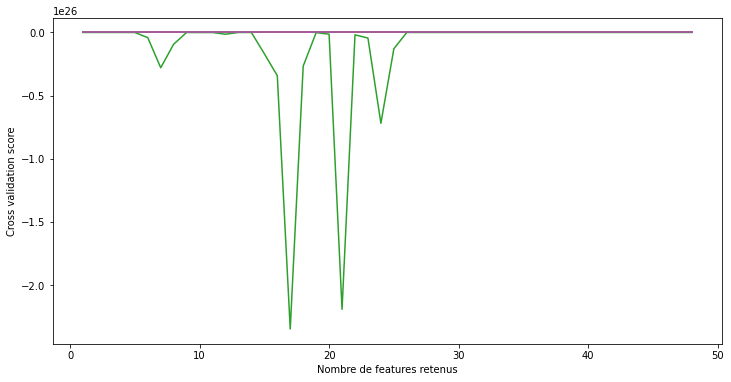

In [ ]:
# visu du score en fonction du nbre de features retenus 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Nombre de features retenus")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Hypothèses de validité pour la régression

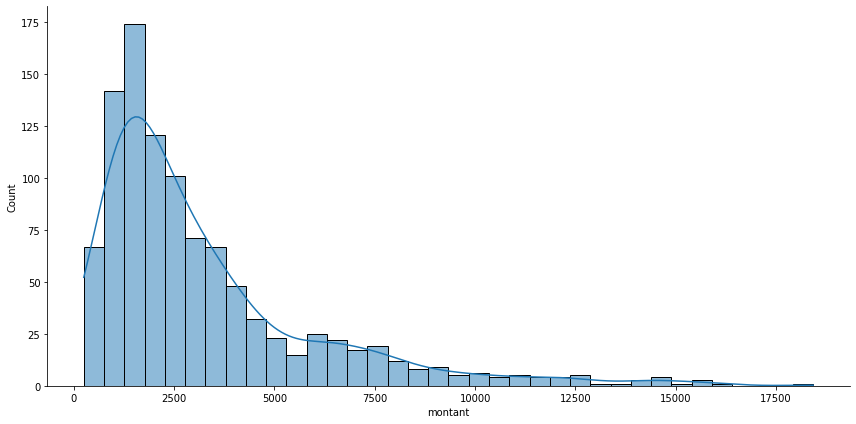

In [ ]:
sn.displot(df, x = 'montant', kde = 'True', height = 6, aspect = 2)

In [ ]:
print("Skewness: %f" % df.montant.skew())
print("Kurtosis: %f" % df.montant.kurt())

Skewness: 1.969395
Kurtosis: 4.376524


In [ ]:
# modèle linéaire
res = sm.OLS(y, X).fit()



On crée une classe pour automatiser le diagnostic des hypothèses de régression linéaire

In [ ]:
class Linear_Reg_Diagnostic():


    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
       

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
  
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
   
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
    
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
   
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
      
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

In [ ]:
cls = Linear_Reg_Diagnostic(res)


## H1: Erreurs centrées

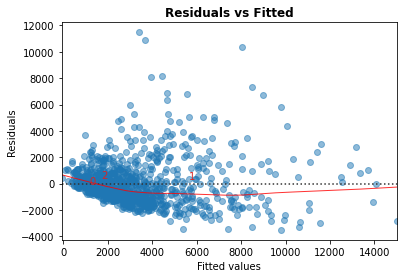

In [ ]:
cls.residual_plot()

Une ligne rouge horizontale à 0 indique un comportement linéaire des résidus. Ici, on peut accepter H1.

## H2: Homoscédasticité

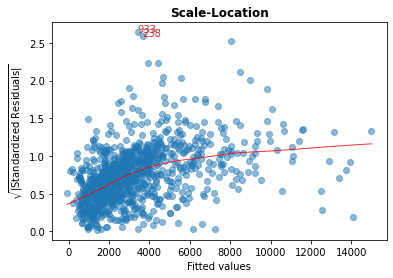

In [ ]:
cls.scale_location_plot()

Une ligne rouge horizontale indiquerait l'homoscédasticité des résidus. Ici, on accepte H2 mais il faut faire attention

##H3: Erreurs non corellés

In [ ]:
cls.vif_table()

                          Features  VIF Factor
2                              age        1.40
1         annees_presence_logement        1.45
3            nbre_emprunts_actuels        1.63
0               duree_emprunt_mois        1.80
4                      revenufinal        1.90
..                             ...         ...
21  compte_epargne_500 - 1000 Euro         inf
22       compte_epargne_< 100 Euro         inf
46                  defaillant_non         inf
25       duree_emploi_4 - 7 annees         inf
47                  defaillant_oui         inf

[48 rows x 2 columns]


 La variance inflation factor (VIF) est une mesure de multicollinéarité. Une VIF > 5 indique que la variable est hautement collinéaire aux autres.

Clairement , on rejette H3 car on a des VIF à valeurs infinis.

## H4: Erreurs gaussiens

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(res.resid)

(0.865247905254364, 1.0057689457635565e-28)

C'est le test de Shapiro. La p-value (à droite) est inférieur à 0.05, on rejette donc H4. Les erreurs ne viennent pas d'une loi gaussienne.

On a donc 2 hypothèses sur 4 qui ne sont pas vérifiés. L'utilisation de la régression linéaire n'est pas vraiment pertinente ici, il faudrait tester d'autres techniques de Machine Learning ( Forêt aléatoires, XGBoost...)